In [11]:
import re,xlrd, xlsxwriter, os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
PATH = r"C:\Users\wodms\OneDrive\바탕 화면"
os.chdir(PATH)
os.listdir()

['.ipynb_checkpoints',
 '1101_회의록.hwp',
 '17',
 '18(상)',
 '18(하)',
 '2018_BASICS결과발표회_수행계획서_삼성물산_예산추가.hwp',
 'analysis_plan.hwp',
 'bus_data.ipynb',
 'BUS_STATION_BOARDING_MONTH_201809.csv',
 'BUS_STATION_BOARDING_MONTH_2018091.csv',
 'desktop.ini',
 'handson',
 'income_data2.R',
 'JetBrains PyCharm Community Edition 2018.2.3 x64.lnk',
 'kaggle',
 'udrims (서울).lnk',
 'Untitled.ipynb',
 'Untitled24.ipynb',
 '빅데이터분석공모전_주제.docx',
 '삼성물산_스터디_책 제본 사진.jpg',
 '서울시 역코드로 지하철 주변 버스정류장 정보.csv']

# Data Load

In [7]:
bus = pd.read_csv(r"BUS_STATION_BOARDING_MONTH_2018091.csv", encoding='utf-8', engine='python', header=None,
                  names=['사용일자','노선번호','노선명','표준버스정보','정류장ID','역명','승차총승객수','하차총승객수','등록일자'])

In [8]:
bus = bus.reset_index() #인덱스가 설정되어 있어서 인덱스를 초기화해줌
bus = bus.iloc[1:,:8]
bus.columns = ['사용일자','노선번호','노선명','표준버스정보','정류장ID','역명','승차총승객수','하차총승객수']

In [9]:
bus.head()

,사용일자,노선번호,노선명,표준버스정보,정류장ID,역명,승차총승객수,하차총승객수
1,20180901,141,141번(도봉산~염곡동),105000079.0,06165,동대문구청.용신동주민센터,255.0,381.0
2,20180901,100,100번(하계동~용산구청),110000327.0,11428,한성여객종점,11.0,0.0
3,20180901,100,100번(하계동~용산구청),110000273.0,11374,서울시립북서울미술관,56.0,0.0
4,20180901,100,100번(하계동~용산구청),110000279.0,11380,중계시영3단지상가,257.0,61.0
5,20180901,100,100번(하계동~용산구청),110000238.0,11339,월계헬스케어센터,175.0,81.0


# bus data EDA

In [ ]:
bus['승차총승객수'].plot.hist()

In [17]:
bus[bus['승차총승객수']==bus['승차총승객수'].max()]

,사용일자,노선번호,노선명,표준버스정보,정류장ID,역명,승차총승객수,하차총승객수
151410,20180904,동대문01,동대문01(회기역~경희대),105900027.0,06502,회기역,6856.0,3633.0


In [18]:
bus[bus['승차총승객수']==bus['승차총승객수'].min()]

,사용일자,노선번호,노선명,표준버스정보,정류장ID,역명,승차총승객수,하차총승객수
76,20180901,753,753번(구산동~상도동),111000300.0,12391,구산동사거리,0.0,39.0
209,20180901,6513,6513번(철산동~서울대),213000172.0,38068,광복시장.철산두산위브아파트,0.0,148.0
213,20180901,6513,6513번(철산동~서울대),213000171.0,38071,철산우성아파트,0.0,54.0
214,20180901,6513,6513번(철산동~서울대),213900015.0,38067,세풍운수종점,0.0,9.0
223,20180901,773,773번(교하운정~불광역),229001658.0,63739,산내마을8.12단지,0.0,81.0
230,20180901,773,773번(교하운정~불광역),229001663.0,63737,교하차고지,0.0,11.0
294,20180901,6616,6616(철산동~온수동),116000202.0,17298,우신고등학교후문,0.0,61.0
311,20180901,774,774번(문산선유리~서울역환승센터),229000990.0,63873,전진사,0.0,2.0
365,20180901,6616,6616(철산동~온수동),213000018.0,38075,철산우성아파트,0.0,54.0
368,20180901,6616,6616(철산동~온수동),213900016.0,38073,세풍운수종점,0.0,7.0


# Data Generate: bus2  

In [32]:
# 1) 사용일자별로 합쳐서 9월달 동안 평균 구하기 
bus['승차총승객수'] = pd.to_numeric(bus['승차총승객수'])
bus2 = pd.DataFrame({'승차총승객수평균': bus.groupby(['역명'])['승차총승객수'].mean()})

In [38]:
round(bus2.describe(),4)

,승차총승객수평균
count,7970.0000
mean,116.3389
std,150.2757
min,0.0000
25%,32.3275
50%,78.9125
75%,149.0250
max,2968.9000


(array([7.422e+03, 4.420e+02, 6.800e+01, 2.100e+01, 4.000e+00, 3.000e+00,
        6.000e+00, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([   0.  ,  296.89,  593.78,  890.67, 1187.56, 1484.45, 1781.34,
        2078.23, 2375.12, 2672.01, 2968.9 ]),
 <a list of 10 Patch objects>)

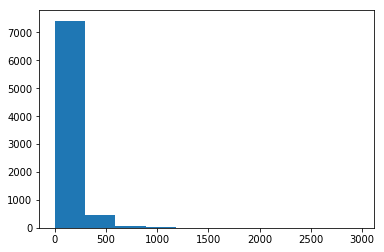

In [39]:
plt.hist(bus2['승차총승객수평균'])

In [42]:
# 2) 승차총승객수평균이 0인 경우 = 종점, 데이터에서 제외
bus2 = bus2[bus2['승차총승객수평균']!=bus2['승차총승객수평균'].min()]

In [6]:
subway = pd.read_csv(r'서울시 역코드로 지하철 주변 버스정류장 정보.csv', engine='python', encoding='utf-8')
subway = subway.reset_index()
subway.columns = ['전철역코드', '외부코드', '전철역명', '호선', '정류장명', '정류장ID', 'X좌표', 'Y좌표'] # 정류장명 변수를 역명 변수로 이름을 바꿈

In [161]:
# bus_subway = pd.merge(bus, subway, how='left')